<a href="https://colab.research.google.com/github/Chirag099/SVM_Classification/blob/main/SVM(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will use SVM (Support Vector Machines) to build and train a model using Universal Bank records, and classify the customer is eligible to take Credit Card or not.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
df = pd.read_csv('UniversalBank.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#Checking For Null Values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
#dropping ID & ZipCodes
df1 = df.drop(['ID','ZIP Code'],axis=1)
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


<Axes: >

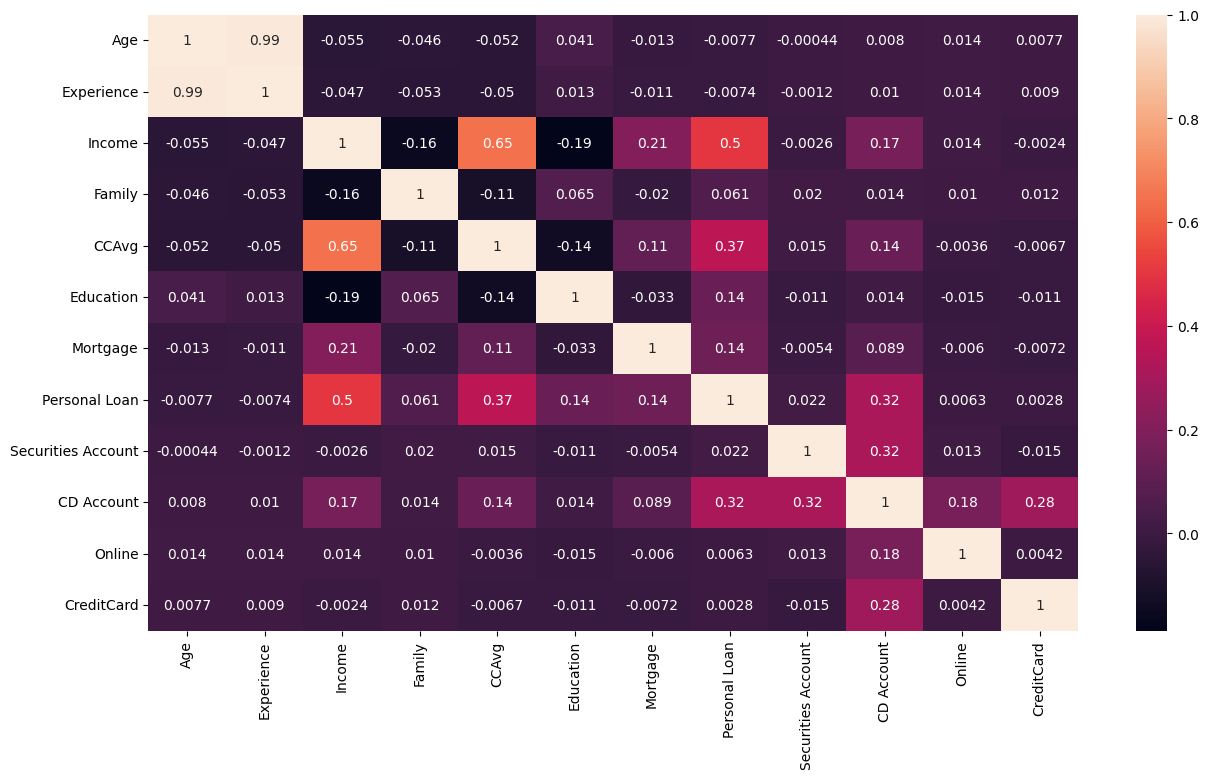

In [22]:
#Plotting heatmap to see the relation
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True)

In [23]:
#Seperating Class 0 and Class 1 data
zero_class = df1[df1.CreditCard==0]
zero_class.shape

(3530, 12)

In [24]:
one_class = df1[df1.CreditCard==1]
one_class.shape

(1470, 12)

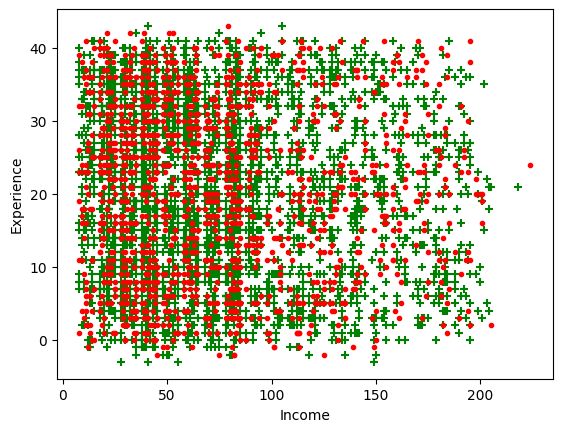

In [25]:
#Income vs Experience Scatter Plot
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_class['Income'],zero_class['Experience'],color='green',marker='+')
plt.scatter(one_class['Income'],one_class['Experience'],color='red',marker='.')


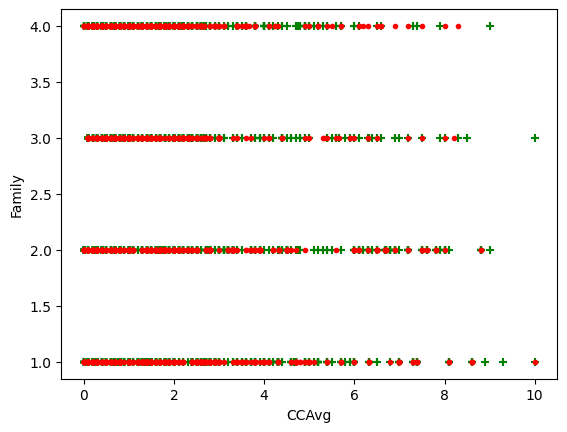

In [26]:
# CCAvg vs Family Scatter Plot
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_class['CCAvg'],zero_class['Family'],color='green',marker='+')
plt.scatter(one_class['CCAvg'],one_class['Family'],color='red',marker='.')

In [17]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df1.drop('CreditCard',axis=1)).transform(df1.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled,columns = df1.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [27]:
#Splitting variables into independent and dependent variable
x = df_scaled
y = df1['CreditCard']

In [28]:
#split data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
#Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print('accuracy:{0:0.3f}'.format(accuracy_score(y_test,y_pred)))

accuracy:0.749


In [34]:
#Apply SVM Model using linear kernel
linear_classifier = SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Accuracy : {0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Accuracy : 0.747


In [35]:
#Apply SVM Model using RBF Kernel
rbf_svc = SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Accuracy : {0:0.3f}'.format(accuracy_score(y_test,y_pred)))


Accuracy : 0.749


In [39]:
#Apply SVM Model using Sigmoid Kernel
st  = SVC(kernel='sigmoid').fit(x_train,y_train)
y_pred = st.predict(x_test)
print('Accuracy : {0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Accuracy : 0.629


Conclusion:
The Gaussian RBF kernel outperforms the other kernels mentioned, yielding a higher prediction accuracy of 0.749 for the model.